In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from typing import Tuple
from glob import glob

In [2]:
def unzip(x):
    for a,b,c,d in x:
        return [a], [b], [c], [d]
        
class MetricHolder(object):
    def __init__(self, metric_name):
        self.metric_name = metric_name
        self.x = []
        self.avg = []
        self.high = []
        self.low = []
    def add(self, arg:Tuple):
        (epoch_n, avg, high, low) = arg
        self.x.append(epoch_n)
        self.avg.append(avg)
        self.high.append(high)
        self.low.append(low)
    def __call__(self):
        asc_order = sorted(zip(self.x, self.avg, self.high, self.low), key=lambda x: x[0])
        xs = []
        avgs = []
        highs = []
        lows = []
        for x, avg, high, low in asc_order:
            xs.append(x)
            avgs.append(avg)
            highs.append(high)
            lows.append(low)
        return xs, avgs, highs, lows

In [3]:
metrics = ["accuracy", "f1_score", "precision", "recall"]
class Graphable(object):
    def __init__(self, path, *, metrics=metrics):    
        self.metrics = {metric : MetricHolder(metric) for metric in metrics}
        self.path = path
    def append(self, metric_name, *, values):
        self.metrics[metric_name].add(values)
    def get(self, metric_name):
        return self.metrics[metric_name]()

In [4]:
dir = "./logs"

variants = {
    "MDN Validation" : Graphable(f"{dir}/MDN_validation_*"),
    "MDN Train" : Graphable(f"{dir}/MDN_train_*"),
    "PRN Validation" : Graphable(f"{dir}/PRN_validation_*"),
    "PRN Train" : Graphable(f"{dir}/PRN_train_*")
}

In [5]:
for key, variant in variants.items():
    for file in glob(variant.path):
        df = pd.read_csv(file)
        for metric in metrics:
            x = int(file.split("_")[-2].split("-")[-1])
            avg = df[metric].mean()
            high = df[metric].max()
            low = df[metric].min()
            variant.append(metric, values=(x,avg,high,low))
            if key == "PRN Validation" and metric == "accuracy":
                print(key,metric,x,avg,high,low)

PRN Validation accuracy 19 0.350714595734127 0.407958984375 0.2481689453125
PRN Validation accuracy 50 0.6402002728174603 0.6776041666666667 0.604248046875
PRN Validation accuracy 3 0.006044224330357143 0.0107421875 0.0042724609375
PRN Validation accuracy 32 0.34993412078373015 0.4606770833333333 0.3095703125
PRN Validation accuracy 14 0.37400367373511906 0.46630859375 0.23193359375
PRN Validation accuracy 23 0.2783187624007936 0.3783854166666666 0.20361328125
PRN Validation accuracy 41 0.5164915054563493 0.5880208333333333 0.4771728515625
PRN Validation accuracy 26 0.271721927703373 0.3864583333333333 0.21826171875
PRN Validation accuracy 11 0.20855848524305554 0.287353515625 0.1049479166666666
PRN Validation accuracy 44 0.5623112754216271 0.5986979166666667 0.53076171875
PRN Validation accuracy 49 0.6282416449652778 0.6653645833333334 0.5926513671875
PRN Validation accuracy 37 0.4444583953373016 0.5177083333333333 0.414794921875
PRN Validation accuracy 6 0.005904715401785714 0.010009

In [19]:
def plot_variant(graphable, *, metric):
    x, avg, high, low = graphable.get(metric)
    print(x,avg,high,low)
    plt.plot(x, avg)
    plt.scatter(x, avg, marker='o')
    plt.grid(True)
    plt.fill_between(x, high, low, alpha=0.2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51] [0.00598997085813492, 0.006162806919642857, 0.006232561383928571, 0.006044224330357143, 0.00621357266865079, 0.006055850074404762, 0.005904715401785714, 0.006477864583333334, 0.011938864087301585, 0.04197242373511905, 0.11106732080853174, 0.20855848524305554, 0.2895713200644841, 0.3444618830605159, 0.37400367373511906, 0.3928939577132936, 0.39709743923611107, 0.3884009951636904, 0.3761513361855159, 0.350714595734127, 0.3303625682043651, 0.31328125, 0.29494435143849207, 0.2783187624007936, 0.2684733072916667, 0.26667867993551586, 0.271721927703373, 0.27831062437996035, 0.28687608506944445, 0.29913736979166666, 0.31748356894841273, 0.33691600012400796, 0.34993412078373015, 0.36840742807539684, 0.3899049789186508, 0.40871892051091274, 0.4306679377480159, 0.4444583953373016, 0.46469222780257935

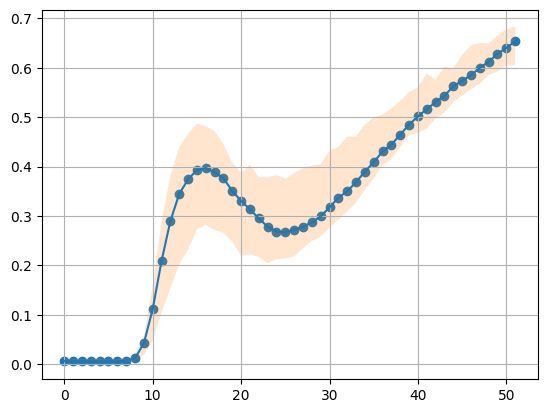

In [20]:
plot_variant(variants["PRN Validation"], metric="accuracy")

In [8]:
#########
# WRONG #
#########
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
# change the dimensions of the graph
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\n# change the dimensions of the graph\nplt.figure(figsize=(10, 5))\nplt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [9]:
"""
dir = "./logs"
files = os.listdir(dir)
for file in files:
    data = pd.read_csv(dir + "/" + file)
    accuracy_avg.append(np.mean(data["accuracy"].values))
    accuracy_std.append(np.std(data["accuracy"].values))

    f1_score_avg.append(np.mean(data["f1_score"].values))
    f1_score_std.append(np.std(data["f1_score"].values))
    
    precision_avg.append(np.mean(data["precision"].values))
    precision_std.append(np.std(data["precision"].values))
    
    recall_avg.append(np.mean(data["recall"].values))
    recall_std.append(np.std(data["recall"].values))
"""

'\ndir = "./logs"\nfiles = os.listdir(dir)\nfor file in files:\n    data = pd.read_csv(dir + "/" + file)\n    accuracy_avg.append(np.mean(data["accuracy"].values))\n    accuracy_std.append(np.std(data["accuracy"].values))\n\n    f1_score_avg.append(np.mean(data["f1_score"].values))\n    f1_score_std.append(np.std(data["f1_score"].values))\n    \n    precision_avg.append(np.mean(data["precision"].values))\n    precision_std.append(np.std(data["precision"].values))\n    \n    recall_avg.append(np.mean(data["recall"].values))\n    recall_std.append(np.std(data["recall"].values))\n'

In [10]:
# print(len(files), len(accuracy_avg), len(f1_score_avg), len(precision_avg), len(recall_avg))

In [11]:
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
plt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=2)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\nplt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=2)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [12]:
"""
# plotting accuracy with respect to epochs with error fill
plt.figure()
plt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, '-o', color='skyblue')
plt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color='pink', alpha=0.4)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error fill\nplt.figure()\nplt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, \'-o\', color=\'skyblue\')\nplt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color=\'pink\', alpha=0.4)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'